# Reshape the renewable generation files from VelocitySuite

In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [48]:
indir = r"/mnt/g/Shared drives/BTO Topic 2  Integrating EE & DR/Task 2/Load_Shape_Data/Renewable Generation Data - ABB Velocity Suite/"

In [49]:
ercot = pd.read_csv(os.path.join(indir,'ERCOT_2016_imputed.csv'), index_col=0)

In [50]:
ercot

Local Datetime (Hour Beginning)  Sum Generation MW
0                      1/1/2016 1:00          4559.5000
1                      1/1/2016 2:00          4558.6000
2                      1/1/2016 3:00          4672.2000
3                      1/1/2016 4:00          4699.3000
4                      1/1/2016 5:00          4546.6000
...                              ...                ...
8779                12/31/2016 20:00          4266.6000
8780                12/31/2016 21:00          3881.8000
8781                12/31/2016 22:00          2881.0000
8782                12/31/2016 23:00          2307.4000
8783                   1/1/2017 0:00          2144.7925

[8784 rows x 2 columns]

In [52]:
ercot['hour_ending'] = ercot.index.values+1
ercot_resh = ercot[['hour_ending', 'Sum Generation MW']]
ercot_resh = ercot_resh.rename(columns={'Sum Generation MW':'total_vre'})
#convert to kWh
ercot_resh.loc[:,'total_vre']*=1000.
ercot_resh

hour_ending  total_vre
0               1  4559500.0
1               2  4558600.0
2               3  4672200.0
3               4  4699300.0
4               5  4546600.0
...           ...        ...
8779         8780  4266600.0
8780         8781  3881800.0
8781         8782  2881000.0
8782         8783  2307400.0
8783         8784  2144792.5

[8784 rows x 2 columns]

In [53]:
ercot_resh.to_csv(os.path.join(indir, 'drpath_inputs/ercot_2016AMY_2016.csv'), index=False)

In [56]:
caiso = pd.read_csv(os.path.join(indir,'CAISO_2016_scaled_imputed.csv'))
caiso = caiso.rename(columns={'Hour ending':'hour_ending'})
caiso_resh = caiso[['hour_ending', 'total_vre']]
caiso_resh.loc[:,'total_vre'] = caiso_resh.loc[:,'total_vre']*1000.
caiso_resh

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


hour_ending    total_vre
0               1  1190217.238
1               2  1128987.651
2               3  1161213.749
3               4  1235333.776
4               5  1153694.326
...           ...          ...
8779         8780  2382288.633
8780         8781  3131539.190
8781         8782  2790274.703
8782         8783  2210562.593
8783         8784  1731479.755

[8784 rows x 2 columns]

In [57]:
caiso['total_vre'].max()

12854.215390000001

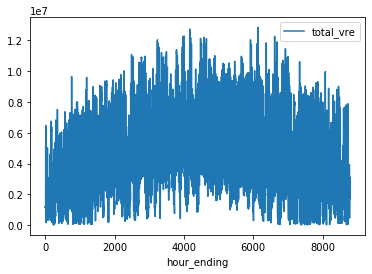

In [59]:
caiso_resh.loc[:].plot(x='hour_ending', y='total_vre')

In [60]:
caiso_resh.to_csv(os.path.join(indir, 'drpath_inputs/caiso_2016AMY_2016.csv'), index=False)

In [61]:
caiso.loc[6620:6640]

hour_ending Local Datetime (Hour Beginning)  Sum Generation MW  month  \
6620         6621                 10/2/2016 20:00               3345     10   
6621         6622                 10/2/2016 21:00               2873     10   
6622         6623                 10/2/2016 22:00               2645     10   
6623         6624                 10/2/2016 23:00               2430     10   
6624         6625                  10/3/2016 0:00               1725     10   
6625         6626                  10/3/2016 1:00               1723     10   
6626         6627                  10/3/2016 2:00               1726     10   
6627         6628                  10/3/2016 3:00               1768     10   
6628         6629                  10/3/2016 4:00               1803     10   
6629         6630                  10/3/2016 5:00               1818     10   
6630         6631                  10/3/2016 6:00               1847     10   
6631         6632                  10/3/2016 7:00               3262     10   
6632         6633                  10/3/2016 8:00               6549     10   
6633         6634                  10/3/2016 9:00               8841     10   
6634         6635                 10/3/2016 10:00               9356     10   
6635         6636                 10/3/2016 11:00               9548     10   
6636         6637                 10/3/2016 12:00               9578     10   
6637         6638                 10/3/2016 13:00               9697     10   
6638         6639                 10/3/2016 14:00               9273     10   
6639         6640                 10/3/2016 15:00               9090     10   
6640         6641                 10/3/2016 16:00               7785     10   

      scale_factor     total_vre  
6620       0.09027   3646.954327  
6621       0.09027   3132.346721  
6622       0.09027   2883.765080  
6623       0.09027   2649.356955  
6624       0.09027   1880.716357  
6625       0.09027   1878.535816  
6626       0.09027   1881.806627  
6627       0.09027   1927.597982  
6628       0.09027   1965.757444  
6629       0.09027   1982.111500  
6630       0.09027   2013.729340  
6631       0.09027   3556.461888  
6632       0.09027   7140.180534  
6633       0.09027   9639.080180  
6634       0.09027  10200.569410  
6635       0.09027  10409.901320  
6636       0.09027  10442.609430  
6637       0.09027  10572.351600  
6638       0.09027  10110.076970  
6639       0.09027   9910.557498  
6640       0.09027   8487.754689

In [29]:
caiso['Scaling Factor'].sort_values(ascending=False)

KeyError: 'Scaling Factor'

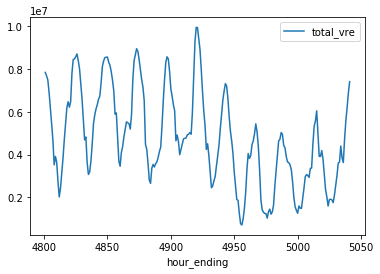

In [62]:
ercot_resh.loc[200*24:210*24].plot(x='hour_ending', y='total_vre')

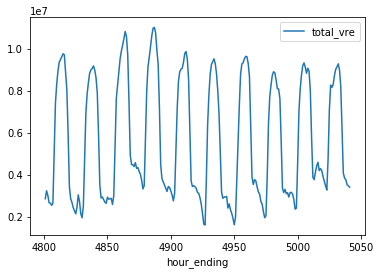

In [64]:
caiso_resh.loc[200*24:210*24].plot(x='hour_ending', y='total_vre')